## Задачи для совместного разбора

In [ ]:
pip install torchtyping

  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from torchtyping import TensorType, patch_typeguard
from typeguard import typechecked
import torch as th

Scalar = TensorType[()]
patch_typeguard()

1\. Используя реализацию из `torch.nn`, решите задачу регрессии. Для расчета градиентов воспользуйтесь возможностями по автоматическому дифференцированию `torch`. В качестве функции потерь используйте собственную реализацию MSE. Для настройки весов реализуйте пакетный градиентный спуск с использованием `torch.optim.SGD`.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [ ]:
import torch.nn as nn

class SyntRegressionModel(nn.Module):
  def __init__(self, n_inputs: int, n_hidden: int) -> None:
    super().__init__()

    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=1)

    self.relu = nn.ReLU()

  def forward(self, X: th.Tensor) -> th.Tensor:
    out = self.fc1(X)
    # out = out.relu()
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
model = SyntRegressionModel(n_inputs=4, n_hidden=2)
# y_pred = model.forward(X)
y_pred = model(X)

In [ ]:
model.fc1.weight

Parameter containing:
tensor([[ 0.2316,  0.2725,  0.4612, -0.4279],
        [-0.4526, -0.4754,  0.3763, -0.1279]], requires_grad=True)

In [ ]:
y_pred.shape

torch.Size([100, 1])

In [ ]:
n_inputs = 4
n_hidden = 1

model = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=n_hidden),
    nn.ReLU(),
    nn.Linear(in_features=n_hidden, out_features=1),
)

In [ ]:
y_pred = model(X)

In [ ]:
criterion = nn.MSELoss()

loss = criterion(y_pred.flatten(), y)
loss

tensor(9564.6084, grad_fn=<MseLossBackward0>)

In [ ]:
loss.backward()

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7cfd923e8510>

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
optimizer.step()
optimizer.zero_grad()

In [ ]:
n_inputs = 4
n_hidden = 1

model = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=n_hidden),
    nn.ReLU(),
    nn.Linear(in_features=n_hidden, out_features=1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for _ in range(100):
  # forward pass
  y_pred = model(X)
  loss = criterion(y_pred.flatten(), y)

  # backprop
  loss.backward()

  # gradient descend
  optimizer.step()
  optimizer.zero_grad()

In [ ]:
loss

tensor(10005.5449, grad_fn=<MseLossBackward0>)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

n_inputs = 4
n_hidden = 1

model = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=1),
    # nn.ReLU(),
    # nn.Linear(in_features=n_hidden, out_features=1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

epoch_losses = []
for epoch in range(100):
  epoch_loss = 0
  for X_batch, y_batch in loader:
    # forward pass
    y_pred = model(X_batch)
    loss = criterion(y_pred.flatten(), y_batch)
    epoch_loss += loss
    # backprop
    loss.backward()

    # gradient descend
    optimizer.step()
    optimizer.zero_grad()
  epoch_loss = epoch_loss / len(loader)
  epoch_losses.append( epoch_loss.item())
  print(epoch, epoch_loss.item())

0 8663.0146484375
1 7566.16015625
2 7692.19677734375
3 5774.2451171875
4 5436.08447265625
5 4677.51513671875
6 3983.07421875
7 3269.798828125
8 3216.462646484375
9 2708.54638671875
10 2422.071533203125
11 2043.6868896484375
12 1701.4573974609375
13 1541.9083251953125
14 1340.79296875
15 1288.5537109375
16 970.11328125
17 936.2674560546875
18 810.6997680664062
19 780.1257934570312
20 606.5485229492188
21 556.4589233398438
22 459.3522033691406
23 419.6374816894531
24 355.4754333496094
25 334.7472839355469
26 290.18798828125
27 243.67787170410156
28 230.6064453125
29 177.3623809814453
30 167.9454803466797
31 161.68751525878906
32 136.1386260986328
33 119.06312561035156
34 92.66917419433594
35 88.16985321044922
36 78.00606536865234
37 72.13556671142578
38 63.523468017578125
39 56.387489318847656
40 50.9036865234375
41 42.4791145324707
42 37.47245407104492
43 34.6677131652832
44 30.005733489990234
45 27.547677993774414
46 24.044084548950195
47 21.541860580444336
48 19.06849479675293
49 15.6

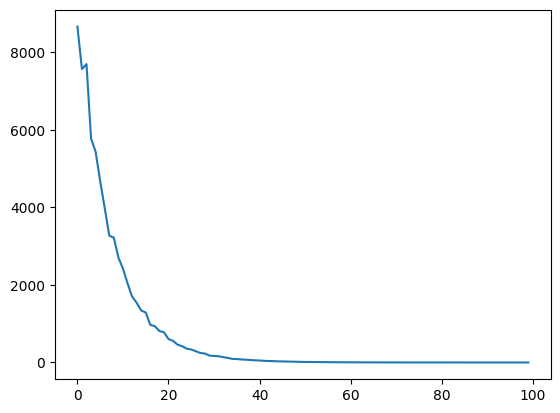

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch_losses)

In [ ]:
def train(model, loader, n_epochs, criterion, optimizer, print_every):
  model.train()
  pass

In [ ]:
@th.no_grad()
def eval(model):
  model.eval()

In [ ]:
with th.no_grad():
  y_pred = model(X)
  print(y_pred.flatten())

tensor([-142.2223,   -3.9681,   -0.3347,  -33.5017,   26.5222,  -22.1065,
          98.1353,   73.1690,  124.3108,  -13.0349, -129.9211,    7.0733,
        -129.7877,  -40.5782,  219.9769, -133.8351,    0.6397,  -55.1435,
         -65.0121,   42.2836, -146.0229,  -67.8349,  -34.7332,  -82.4725,
          52.6119, -175.1735,  -37.6561, -104.9016, -142.3109,  140.4642,
         -35.0005,   10.7474,   95.4299, -158.3733,   -8.0295,   79.6686,
        -105.6843, -165.9831,  -11.9526,    4.2130,   38.4981,   30.6205,
         -90.5180,  156.6114,  132.6114,   66.0135,    9.4843,  104.9913,
          61.5150,  -77.7560,    9.0347,   59.5998,   75.5635,  -35.1942,
          20.3560,   43.5337,   32.5159,    7.2357,   -4.4607,   94.1808,
         -81.8152,   51.3535,   65.9938,   38.4395,  137.2492,  -74.6165,
         -69.1137,    8.5040, -130.0887, -107.8726,  121.4831,    7.8904,
        -140.5839,  -81.1990,   85.0024,   98.3323,   30.2607,  102.7913,
        -117.2347, -100.1447,  -41.016

In [ ]:
with th.no_grad():
  y_pred = model(X)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, y_pred.flatten())

0.9999942481748334

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 13.9 MB/s eta 0:00:00


In [ ]:
import torchmetrics as M

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

n_inputs = 4
n_hidden = 1

model = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=1),
    # nn.ReLU(),
    # nn.Linear(in_features=n_hidden, out_features=1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

epoch_losses = []
for epoch in range(100):
  epoch_loss = 0
  r2_metric = M.R2Score()
  for X_batch, y_batch in loader:
    # forward pass
    y_pred = model(X_batch)
    loss = criterion(y_pred.flatten(), y_batch)
    epoch_loss += loss
    r2_metric.update(y_pred.flatten(), y_batch)
    # backprop
    loss.backward()

    # gradient descend
    optimizer.step()
    optimizer.zero_grad()
  epoch_loss = epoch_loss / len(loader)
  epoch_losses.append( epoch_loss.item())
  r2_epoch = r2_metric.compute()
  print(epoch, epoch_loss.item(), r2_epoch)

0 8562.8017578125 tensor(0.0427)
1 7731.93408203125 tensor(0.1597)
2 8398.6015625 tensor(0.2653)
3 5639.02880859375 tensor(0.3787)
4 5163.15185546875 tensor(0.4545)
5 4296.4931640625 tensor(0.5235)
6 3996.596435546875 tensor(0.5814)
7 3455.772705078125 tensor(0.6350)
8 3086.505615234375 tensor(0.6802)
9 2444.874267578125 tensor(0.7211)
10 2342.742431640625 tensor(0.7536)
11 2187.14111328125 tensor(0.7843)
12 1784.508056640625 tensor(0.8127)
13 1562.5423583984375 tensor(0.8362)
14 1270.9010009765625 tensor(0.8567)
15 1177.595947265625 tensor(0.8735)
16 982.3495483398438 tensor(0.8888)
17 869.3939819335938 tensor(0.9016)
18 792.0260620117188 tensor(0.9128)
19 720.3367919921875 tensor(0.9230)
20 719.0626220703125 tensor(0.9324)
21 517.5955810546875 tensor(0.9413)
22 459.67144775390625 tensor(0.9480)
23 411.5140075683594 tensor(0.9540)
24 393.16839599609375 tensor(0.9592)
25 318.7900695800781 tensor(0.9642)
26 293.79254150390625 tensor(0.9683)
27 257.76043701171875 tensor(0.9719)
28 219.96

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию полносвязного слоя из `torch.nn` решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim.SGD`. Для создания модели опишите класс `SineModel`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 100 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте промежуточные прогнозы моделей. Визуализируйте облако точек и прогнозы модели в начале, середине и после окончания процесса обучения (не обязательно три, можно взять больше промежуточных вариантов).

Выведите график изменения значения функции потерь в процессе обучения. Логику расчета значения функции потерь на уровне эпохи реализуйте самостоятельно.

- [ ] Проверено на семинаре

In [ ]:
import torch as th

X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())
# X = th.FloatTensor(X)
# y = th.FloatTensor(y)
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
import torch.nn as nn
class SineModel(nn.Module):
    def __init__(self, n_features: int, n_hidden: int, n_out: int) -> None:
        super().__init__()
        self.fc1 = nn.Linear(in_features=n_features, out_features=n_hidden)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=n_hidden, out_features=1)

    def forward(self, X: TensorType["batch", "n_features"]) -> TensorType["batch", 1]:
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
model = SineModel(n_features=1, n_hidden=100, n_out=1)


criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

epoch_losses = []
for epoch in range(100):
  epoch_loss = 0
  for X_batch, y_batch in loader:

    # forward pass
    y_pred = model(X_batch)
    loss = criterion(y_pred, y_batch)
    epoch_loss += loss

    # backprop
    loss.backward()

    # gradient descend
    optimizer.step()
    optimizer.zero_grad()
    epoch_loss = epoch_loss / len(loader)
  if epoch%20==0:

    epoch_losses.append( epoch_loss.item())
    print(epoch, epoch_loss.item())

0 0.06178431212902069
20 0.015029086731374264
40 0.018311679363250732
60 0.00716837914660573
80 0.031303342431783676


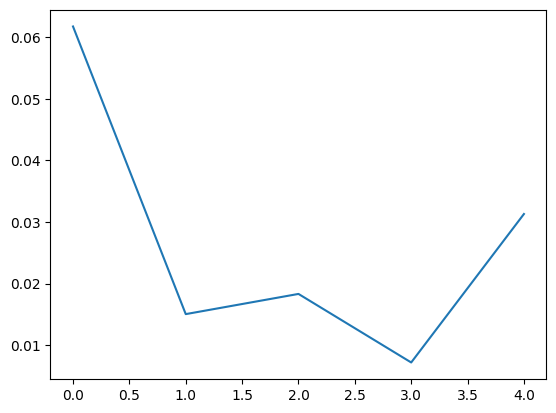

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch_losses);

<p class="task" id="2"></p>

2\. Повторите решение задачи 1, изменив модель. Для создания модели создайте объект класса `nn.Sequential`.

Предлагаемая архитектура нейронной сети:
1. Полносвязный слой с 50 нейронами
2. Активация Tanh
3. Полносвязный слой с 1 нейроном

- [ ] Проверено на семинаре

In [ ]:
import torch

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.rand(X.size())

X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

n_inputs = 1
n_hidden = 50

model = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=n_hidden),
    nn.Tanh(),
    nn.Linear(in_features=n_hidden, out_features=1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epoch_losses = []
for epoch in range(100):
  epoch_loss = 0
  for X_batch, y_batch in loader:

    # forward pass
    y_pred = model(X_batch)
    loss = criterion(y_pred, y_batch)
    epoch_loss += loss

    # backprop
    loss.backward()

    # gradient descend
    optimizer.step()
    optimizer.zero_grad()
    epoch_loss = epoch_loss / len(loader)

  if epoch%20==0:
    epoch_losses.append( epoch_loss.item())
    print(epoch, epoch_loss.item())

0 0.04401695355772972
20 0.020222146064043045
40 0.011737098917365074
60 0.012984339147806168
80 0.021645724773406982


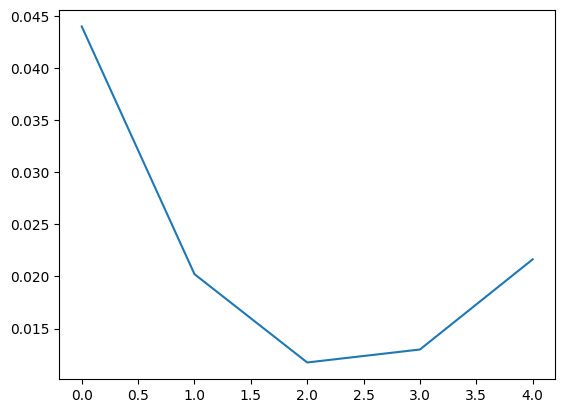

In [ ]:
plt.plot(epoch_losses);

<p class="task" id="3"></p>

3\. Используя реализацию полносвязного слоя из `torch.nn`, решите задачу регрессии. В качестве функции потерь используйте реализацию MSE из `torch.nn`. Для настройки весов реализуйте мини-пакетный градиентный спуск с использованием `torch.optim.SGD`. Перенесите вычисления на GPU и сравните время обучения с и без использования GPU. Решение должно корректно работать в случае отсутствия GPU без дополнительных изменений в коде.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(
    n_samples=10000,
    n_features=10,
    n_informative=6,
    coef=True,
    bias=0.5,
    random_state=42
)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
X.shape, y.shape

(torch.Size([10000, 10]), torch.Size([10000, 1]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

n_inputs = 10
n_hidden = 20

model = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=n_hidden),
    nn.ReLU(),
    nn.Linear(in_features=n_hidden, out_features=1),
)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0005)

In [ ]:
#CPU
import time

start_time = time.time()
epoch_losses = []
for epoch in range(50):
  epoch_loss = 0
  for X_batch, y_batch in loader:

    # forward pass
    y_pred = model(X_batch)
    loss = criterion(y_pred, y_batch)
    epoch_loss += loss

    # backprop
    loss.backward()

    # gradient descend
    optimizer.step()
    optimizer.zero_grad()


  if epoch%10==0:
    epoch_loss = epoch_loss / len(loader)
    epoch_losses.append(epoch_loss.item())
    print(epoch, epoch_loss.item())
end_time = time.time()
execution_time = end_time - start_time
print(f"Время выполнения на CPU: {execution_time} секунд")

0 640.785400390625
10 0.04496388882398605
20 0.017951546236872673
30 0.010038048028945923
40 0.0063351476565003395
Время выполнения на CPU: 49.617854833602905 секунд


In [ ]:
#GPU с предварительной проверкой наличия
import time

if th.cuda.is_available():
    device = th.device("cuda")
    model = model.to(device)
    start_time = time.time()
    epoch_losses = []
    for epoch in range(50):
        epoch_loss = 0
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            epoch_loss += loss

            # backprop
            loss.backward()

            # gradient descend
            optimizer.step()
            optimizer.zero_grad()


        if epoch%10==0:
            epoch_loss = epoch_loss / len(loader)
            epoch_losses.append(epoch_loss.item())
            print(epoch, epoch_loss.item())
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Время выполнения на GPU: {execution_time} секунд")
else:
    print('GPU не обнаружена')

0 721.2403564453125
10 0.05686447024345398
20 0.020635327324271202
30 0.012018298730254173
40 0.007553787901997566
Время выполнения на GPU: 80.6961042881012 секунд


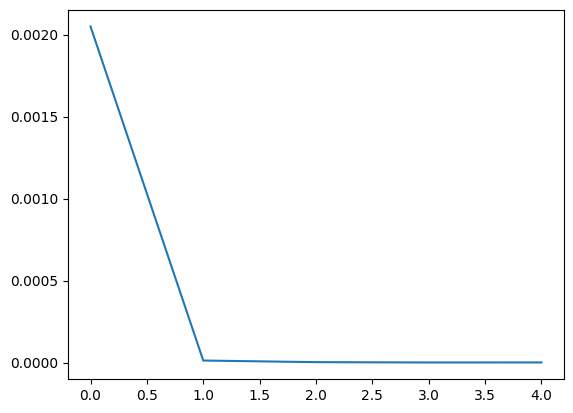

In [ ]:
plt.plot(epoch_losses);

<p class="task" id="4"></p>

4\. Повторите решение задач 1-2, используя для расчета значения функции потерь за эпоху метрику `MeanMetric` из пакета `torchmetrics`. Добавьте в цикл обучения расчет метрики $R^2$ (воспользуйтесь реализацией из `torchmetrics`). Выведите на экран график изменения значения функции потерь и метрики $R^2$ по эпохам в процессе обучения.

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install torchtyping

  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import torch as th

X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())
# X = th.FloatTensor(X)
# y = th.FloatTensor(y)
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
import torch.nn as nn
from torchtyping import TensorType

class SineModel(nn.Module):
    def __init__(self, n_features: int, n_hidden: int, n_out: int) -> None:
        super().__init__()
        self.fc1 = nn.Linear(in_features=n_features, out_features=n_hidden)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=n_hidden, out_features=1)

    def forward(self, X: TensorType["batch", "n_features"]) -> TensorType["batch", 1]:
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
import torchmetrics as M

model = SineModel(n_features=1, n_hidden=100, n_out=1)

criterion = M.MeanMetric()
r2_metric = M.R2Score()
epoch_losses = []
r2_values = []

optimizer = optim.SGD(model.parameters(), lr=0.001)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

for epoch in range(300):
    epoch_loss = 0
    criterion.reset()  # Сброс метрики для новой эпохи
    r2_metric.reset()
    for X_batch, y_batch in loader:

        # forward pass
        y_pred = model(X_batch)

        loss = nn.MSELoss()(y_pred, y_batch)
        criterion.update(loss.item())
        r2_metric.update(y_pred, y_batch)

        # backprop
        loss.backward()

        # gradient descend
        optimizer.step()
        optimizer.zero_grad()
    epoch_loss = criterion.compute()
    r2_value = r2_metric.compute()
    epoch_losses.append(epoch_loss.item())
    r2_values.append(r2_value)

    if epoch % 40 == 0:
        print(f"Epoch {epoch}: Loss = {epoch_loss.item()}, R² = {r2_value}")

Epoch 0: Loss = 0.47101476788520813, R² = 0.02158588171005249
Epoch 40: Loss = 0.2300194799900055, R² = 0.5458099842071533
Epoch 80: Loss = 0.20134171843528748, R² = 0.600454568862915
Epoch 120: Loss = 0.19125105440616608, R² = 0.6102635264396667
Epoch 160: Loss = 0.19195573031902313, R² = 0.612318217754364
Epoch 200: Loss = 0.18521808087825775, R² = 0.6163214445114136
Epoch 240: Loss = 0.1855301707983017, R² = 0.619641900062561
Epoch 280: Loss = 0.18294787406921387, R² = 0.6239058375358582


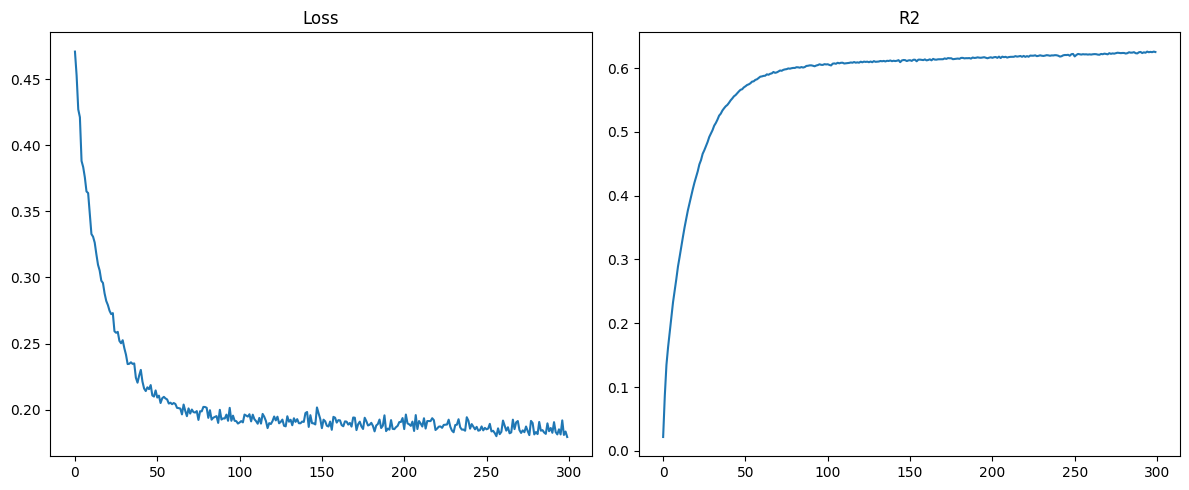

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epoch_losses)
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(r2_values)
plt.title('R2')

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Повторите решение задач 1-2, изменив функцию потерь. Обучите модель, используя три функции потерь: `MSELoss`, `L1Loss` и `HuberLoss` - и выведите на одном графике динамику изменения метрики $R^2$ по эпохам для каждой модели в процессе обучения. Добавьте подписи полученных кривых.

- [ ] Проверено на семинаре

In [ ]:
import torch as th

X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())
# X = th.FloatTensor(X)
# y = th.FloatTensor(y)
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
import torch.nn as nn
from torchtyping import TensorType

class SineModel(nn.Module):
    def __init__(self, n_features: int, n_hidden: int, n_out: int) -> None:
        super().__init__()
        self.fc1 = nn.Linear(in_features=n_features, out_features=n_hidden)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(in_features=n_hidden, out_features=1)

    def forward(self, X: TensorType["batch", "n_features"]) -> TensorType["batch", 1]:
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
#import torchmetrics as M

model = SineModel(n_features=1, n_hidden=100, n_out=1)

r2_values_mse = []
r2_values_l1 = []
r2_values_huber = []

loss_functions = {
    'MSELoss': nn.MSELoss(),
    'L1Loss': nn.L1Loss(),
    'HuberLoss': nn.HuberLoss()
}

optimizer = optim.SGD(model.parameters(), lr=0.001)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

for loss_name, loss_function in loss_functions.items():
    model = SineModel(n_features=1, n_hidden=100, n_out=1)
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    r2_metric = M.R2Score()

    for epoch in range(250):
        r2_metric.reset()  # Сброс метрики

        for X_batch, y_batch in loader:
            # Forward pass
            y_pred = model(X_batch)

            loss = loss_function(y_pred, y_batch)

            # Обновление метрики
            r2_metric.update(y_pred, y_batch)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        r2_value = r2_metric.compute()
        if epoch % 50 == 0:
            print(f"{loss_name} - Epoch {epoch}: R2 = {r2_value}")

        if loss_name == 'MSELoss':
            r2_values_mse.append(r2_value)
        elif loss_name == 'L1Loss':
            r2_values_l1.append(r2_value)
        elif loss_name == 'HuberLoss':
            r2_values_huber.append(r2_value)


MSELoss - Epoch 0: R2 = -7.232236862182617
MSELoss - Epoch 50: R2 = 0.9507807493209839
MSELoss - Epoch 100: R2 = 0.9912292957305908
MSELoss - Epoch 150: R2 = 0.9951131939888
MSELoss - Epoch 200: R2 = 0.9974588751792908
L1Loss - Epoch 0: R2 = -1.4939053058624268
L1Loss - Epoch 50: R2 = 0.8410342931747437
L1Loss - Epoch 100: R2 = 0.8952474594116211
L1Loss - Epoch 150: R2 = 0.9154832363128662
L1Loss - Epoch 200: R2 = 0.9555574655532837
HuberLoss - Epoch 0: R2 = -0.3456186056137085
HuberLoss - Epoch 50: R2 = 0.8450700044631958
HuberLoss - Epoch 100: R2 = 0.9373629093170166
HuberLoss - Epoch 150: R2 = 0.9809027910232544
HuberLoss - Epoch 200: R2 = 0.9901684522628784


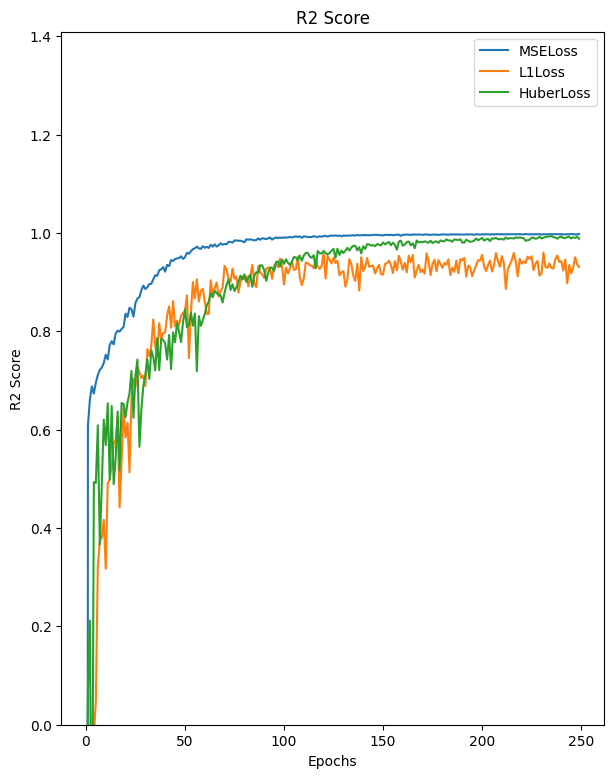

In [ ]:
plt.figure(figsize=(7, 9))
plt.plot(r2_values_mse, label='MSELoss')
plt.plot(r2_values_l1, label='L1Loss')
plt.plot(r2_values_huber, label='HuberLoss')
plt.title('R2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()
plt.ylim(0)
plt.show()

<p class="task" id="6"></p>

6\. Повторите решение задач 1-2, разделив датасет на обучающую и тестовую выборку в соотношении 80% на 20%. Обучите модель. Для тестовой выборки посчитайте и выведите на экран значения метрик:

- MAE;
- MAPE;
- MSE;
- MSLE (MeanSquaredLogError).


- [ ] Проверено на семинаре

In [ ]:
from torch.utils.data import DataLoader, TensorDataset, random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
import torchmetrics as M

model = SineModel(n_features=1, n_hidden=100, n_out=1)
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()


# Обучение модели
for epoch in range(300):
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
mae_metric = M.MeanAbsoluteError()
mse_metric = M.MeanSquaredError()
mape_metric = M.MeanAbsolutePercentageError()
msle_metric = M.MeanSquaredLogError()

with th.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        # Обновление метрик
        mae_metric.update(y_pred, y_batch)
        mse_metric.update(y_pred, y_batch)
        mape_metric.update(y_pred, y_batch)
        msle_metric.update(y_pred, y_batch)

mae_value = mae_metric.compute()
mse_value = mse_metric.compute()
mape_value = mape_metric.compute()
msle_value = msle_metric.compute()

print(f"MAE: {mae_value.item()}")
print(f"MSE: {mse_value.item()}")
print(f"MAPE: {mape_value.item()}")
print(f"MSLE: {msle_value.item()}")

MAE: 0.40840452909469604
MSE: 0.19951096177101135
MAPE: 0.6584360599517822
MSLE: 1.1470650434494019
